In [ ]:
#lets start with some imports

#Py-ART, simply the best sowftware around.. Give those guys a grant
import pyart
#timezone info
import pytz

#plotting
from matplotlib import pyplot as plt

#plotting on a maop
import cartopy

import xarray as xr
import os


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
#matplotlib qt
%matplotlib inline

In [32]:
ddir = '/data/utqiagvik/'
radar = pyart.io.read('/data/utqiagvik/BRW190121084803.RAWTA7Z.maint')
print(radar.longitude, radar.latitude)
#71.3252729,-156.6715376
radar.longitude['data'] = radar.longitude['data'] -0.06
print(radar.longitude, radar.latitude)


{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([-156.66763997])} {'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([71.32481011])}
{'long_name': 'Longitude', 'standard_name': 'Longitude', 'units': 'degrees_east', 'data': array([-156.72763997])} {'long_name': 'Latitude', 'standard_name': 'Latitude', 'units': 'degrees_north', 'data': array([71.32481011])}


In [27]:
rlat = radar.latitude['data'][0]
rlon = radar.longitude['data'][0]
sweep = 0

#Get the date at the start of collection
index_at_start = radar.sweep_start_ray_index['data'][sweep]
time_at_start_of_radar = pyart.io.cfradial.netCDF4.num2date(radar.time['data'][index_at_start], 
                                  radar.time['units'])

#make a nice time stamp
pacific = pytz.timezone('US/Alaska')
local_time = pacific.fromutc(time_at_start_of_radar)
fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
print(fancy_date_string)

Sunday January 20 at 11:48 PM AKST


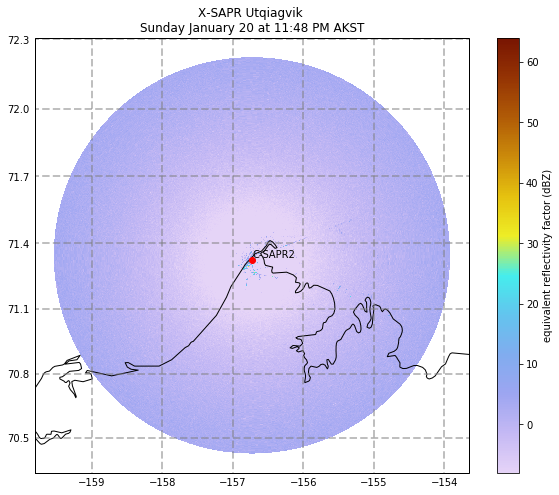

In [28]:
#Set up our figure
fig = plt.figure(figsize = [10,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title,
    projection=projection, resolution='10m', 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=-8, vmax=64)

# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='C-SAPR2')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

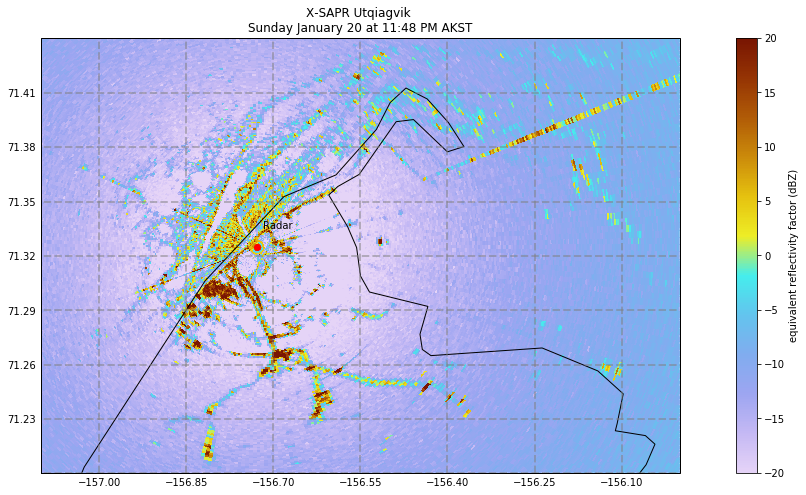

In [31]:
#Set up our figure
fig = plt.figure(figsize = [20,8])

#create a Cartopy Py-ART display object
display = pyart.graph.RadarMapDisplay(radar)

#get center of the display for the projection
lat_0 = rlat
lon_0 = rlon*-1

# Main difference from Basemap! 
#Cartopy forces you to select a projection first!
projection = cartopy.crs.Mercator(
                central_longitude=lon_0,
                min_latitude=rlat-5., max_latitude=rlat+5.)

title = 'X-SAPR Utqiagvik \n' + fancy_date_string

#plot a PPI! add coastline at 10m resolution
display.plot_ppi_map(
    'reflectivity', sweep, colorbar_flag=True,
    title=title, resolution='10m',
    projection=projection, 
    cmap=pyart.graph.cm.LangRainbow12,
    vmin=-20, vmax=20, min_lon=-157.1, 
    min_lat=71.2, max_lon=-156, max_lat=71.44 )

#plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


# Mark the radar
display.plot_point(lon_0*-1, lat_0, label_text='Radar')

# Plot some lat and lon lines
gl = display.ax.gridlines(draw_labels=True,
                          linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
plt.savefig(fnamestr)

In [30]:
print(fnamestr)

/data/utqiagvik/xsaprimg-20190120-2348.jpg


In [24]:
radar.longitude

{'long_name': 'Longitude',
 'standard_name': 'Longitude',
 'units': 'degrees_east',
 'data': array([-156.71763997])}

In [33]:
def plotme(fname):
    radar = pyart.io.read(fname)
    radar.longitude['data'] = radar.longitude['data'] -0.06
    rlat = radar.latitude['data'][0]
    rlon = radar.longitude['data'][0]
    sweep = 0

    #Get the date at the start of collection
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = pyart.io.cfradial.netCDF4.num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])

    #make a nice time stamp
    pacific = pytz.timezone('US/Alaska')
    local_time = pacific.fromutc(time_at_start_of_radar)
    fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
    print(fancy_date_string)
    #Set up our figure
    fig = plt.figure(figsize = [20,8])

    #create a Cartopy Py-ART display object
    display = pyart.graph.RadarMapDisplay(radar)

    #get center of the display for the projection
    lat_0 = rlat
    lon_0 = rlon*-1

    # Main difference from Basemap! 
    #Cartopy forces you to select a projection first!
    projection = cartopy.crs.Mercator(
                    central_longitude=lon_0,
                    min_latitude=rlat-5., max_latitude=rlat+5.)

    title = 'X-SAPR Utqiagvik \n' + fancy_date_string

    #plot a PPI! add coastline at 10m resolution
    display.plot_ppi_map(
        'reflectivity', sweep, colorbar_flag=True,
        title=title, resolution='10m',
        projection=projection, 
        cmap=pyart.graph.cm.LangRainbow12,
        vmin=-20, vmax=20, min_lon=-157.1, 
        min_lat=71.2, max_lon=-156, max_lat=71.44 )

    #plt.gca().coastlines(resolution='10m', color='black', linewidth=1)


    # Mark the radar
    display.plot_point(lon_0*-1, lat_0, label_text='X-SAPR')

    # Plot some lat and lon lines
    gl = display.ax.gridlines(draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False
    fnamestr = local_time.strftime('/data/utqiagvik/xsaprimg-%Y%m%d-%H%M.jpg')
    plt.savefig(fnamestr)
    plt.close(fig)
    del radar

In [34]:
ddir = '/data/utqiagvik/'
af = os.listdir(ddir)
gf = []
for tf in af:
    if 'BRW' in tf:
        gf.append(ddir+tf)
    

In [35]:
gf.sort()

In [36]:
for tf in gf:
    plotme(tf)

Saturday January 19 at 03:00 PM AKST
Saturday January 19 at 03:12 PM AKST
Saturday January 19 at 03:24 PM AKST
Saturday January 19 at 03:36 PM AKST
Saturday January 19 at 03:48 PM AKST
Saturday January 19 at 04:00 PM AKST
Saturday January 19 at 04:12 PM AKST
Saturday January 19 at 04:24 PM AKST
Saturday January 19 at 04:36 PM AKST
Saturday January 19 at 04:48 PM AKST
Saturday January 19 at 05:00 PM AKST
Saturday January 19 at 05:12 PM AKST
Saturday January 19 at 05:24 PM AKST
Saturday January 19 at 05:36 PM AKST
Saturday January 19 at 05:48 PM AKST
Saturday January 19 at 06:00 PM AKST
Saturday January 19 at 06:12 PM AKST
Saturday January 19 at 06:24 PM AKST
Saturday January 19 at 06:36 PM AKST
Saturday January 19 at 06:48 PM AKST
Saturday January 19 at 07:00 PM AKST
Saturday January 19 at 07:12 PM AKST
Saturday January 19 at 07:24 PM AKST
Saturday January 19 at 07:36 PM AKST
Saturday January 19 at 07:48 PM AKST
Saturday January 19 at 08:00 PM AKST
Saturday January 19 at 08:12 PM AKST
S

Monday January 21 at 01:24 PM AKST
Monday January 21 at 01:36 PM AKST
Monday January 21 at 01:48 PM AKST
Monday January 21 at 02:00 PM AKST
Monday January 21 at 02:12 PM AKST
Monday January 21 at 02:24 PM AKST
Monday January 21 at 02:36 PM AKST
Monday January 21 at 02:48 PM AKST
